In [13]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
# !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
# # !pip install gap-stat
# from gap_statistic.optimalK import OptimalK
from scipy import stats
# import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
# !pip install optuna
# import optuna
import xgboost as xgb
# !pip install catboost
# !pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"
import lightgbm as lgb
!pip install category_encoders
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.7 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.7 MB 5.0 MB/s eta 0:00:02
   --------------------------------- ------ 8.1/9.7 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 12.3 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodel

d:\soft\anaconda3\envs\Kaggle-Titanic-20250623\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [14]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [15]:
table = PrettyTable()
table.field_names = ['Column Name', 'Data Type', 'Non-Null Count']
for column in train.columns:
    data_type = str(train[column].dtype)
    non_null_count = train[column].count()
    table.add_row([column, data_type, non_null_count])

print(table)

+--------------+-----------+----------------+
| Column Name  | Data Type | Non-Null Count |
+--------------+-----------+----------------+
| PassengerId  |   object  |      8693      |
|  HomePlanet  |   object  |      8492      |
|  CryoSleep   |   object  |      8476      |
|    Cabin     |   object  |      8494      |
| Destination  |   object  |      8511      |
|     Age      |  float64  |      8514      |
|     VIP      |   object  |      8490      |
| RoomService  |  float64  |      8512      |
|  FoodCourt   |  float64  |      8510      |
| ShoppingMall |  float64  |      8485      |
|     Spa      |  float64  |      8510      |
|    VRDeck    |  float64  |      8505      |
|     Name     |   object  |      8493      |
| Transported  |    bool   |      8693      |
+--------------+-----------+----------------+


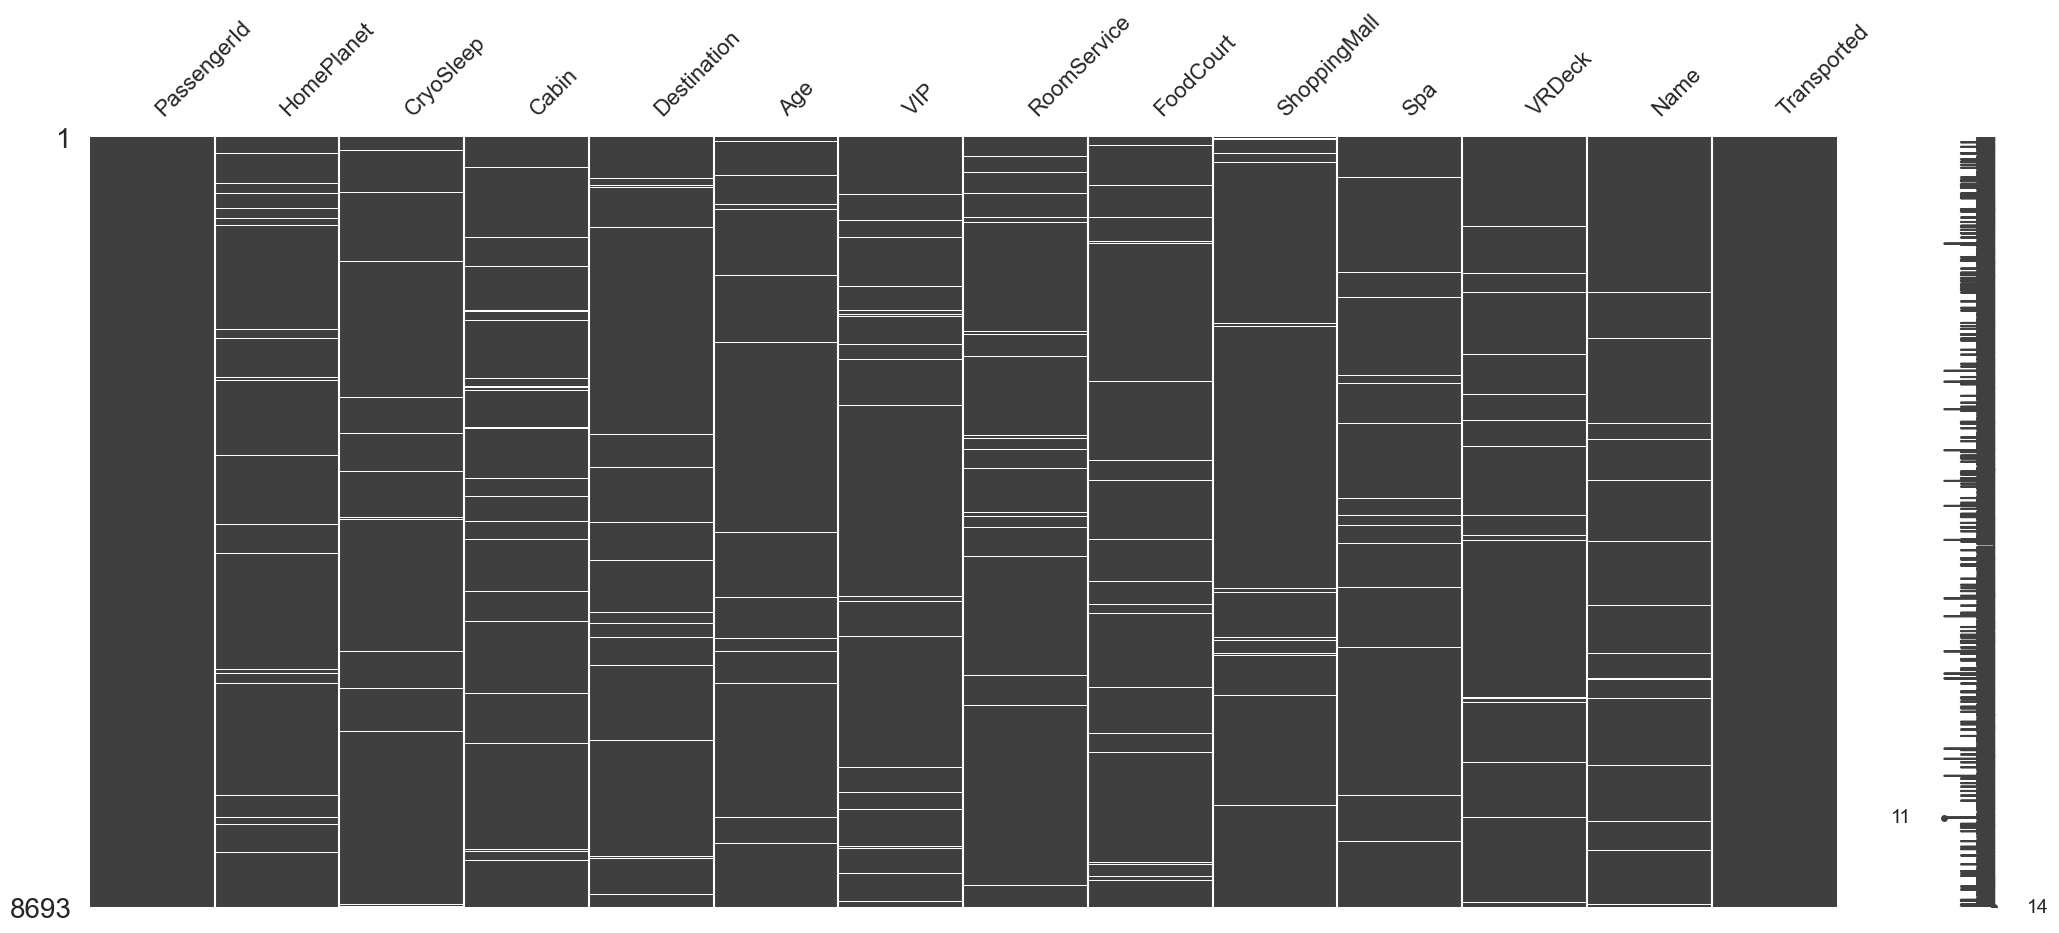

In [16]:
msno.matrix(train)
plt.show()

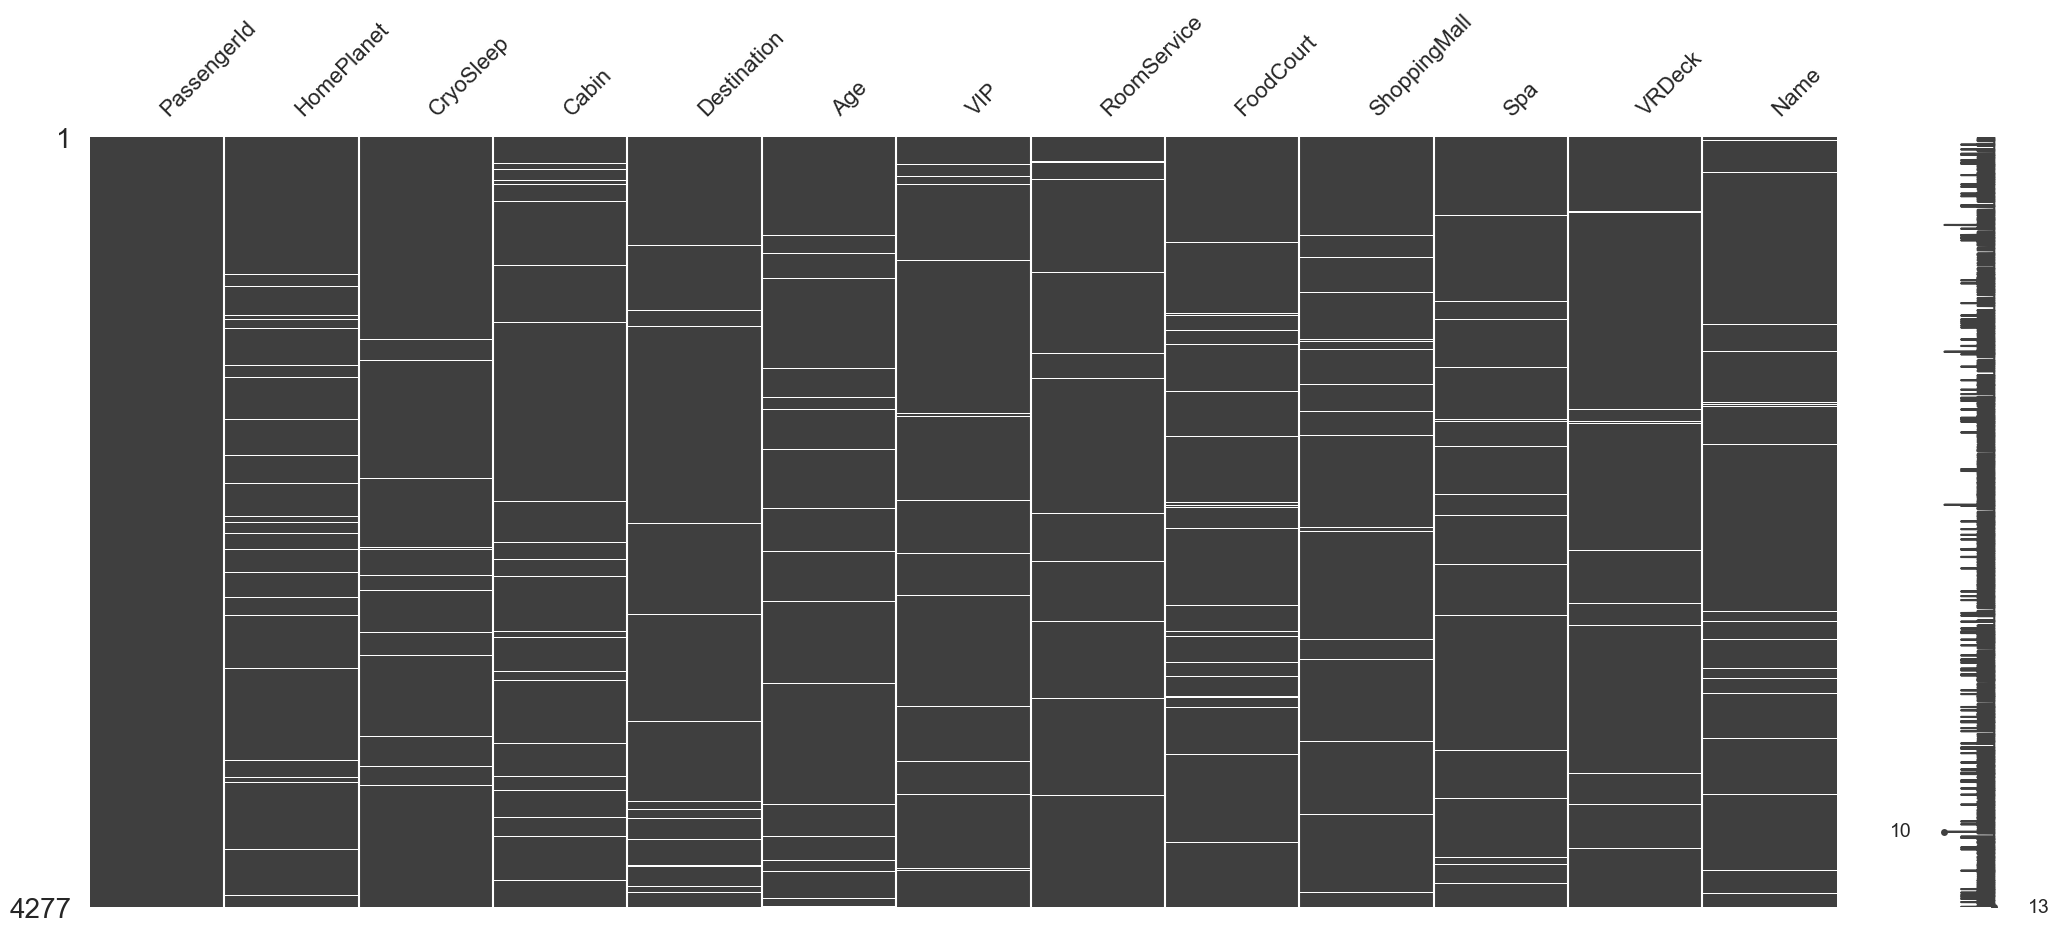

In [17]:
msno.matrix(test)
plt.show()

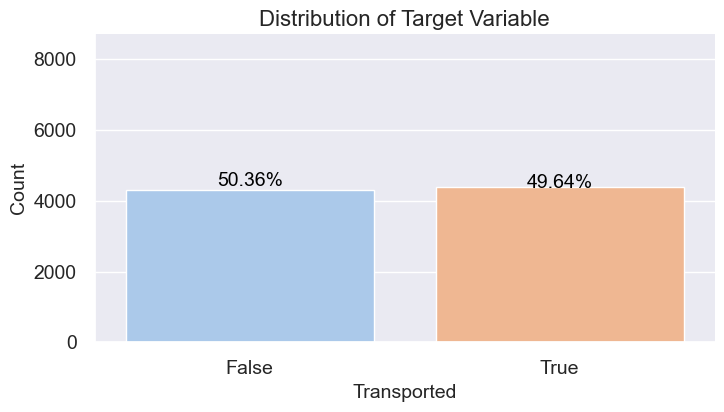

In [18]:
# Calculate the proportion of each class
class_counts = train['Transported'].value_counts()
class_proportions = class_counts / train.shape[0]
class_proportions = class_proportions.values.tolist()
class_proportions_str = [f'{prop:.2%}' for prop in class_proportions]

# Set the color palette
colors = sns.color_palette('pastel')[0:len(class_counts)]

# Plot the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='Transported', data=train, palette=colors)
plt.title('Distribution of Target Variable', fontsize=16)
plt.xlabel('Transported', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim([0, len(train)])
for i, count in enumerate(class_counts):
    plt.text(i, count + 50, class_proportions_str[i], ha='center', fontsize=14, color='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

In [19]:
cont_cols = [f for f in train.columns if train[f].dtype in ['int', 'float'] and train[f].nunique() > 3]
print(cont_cols)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


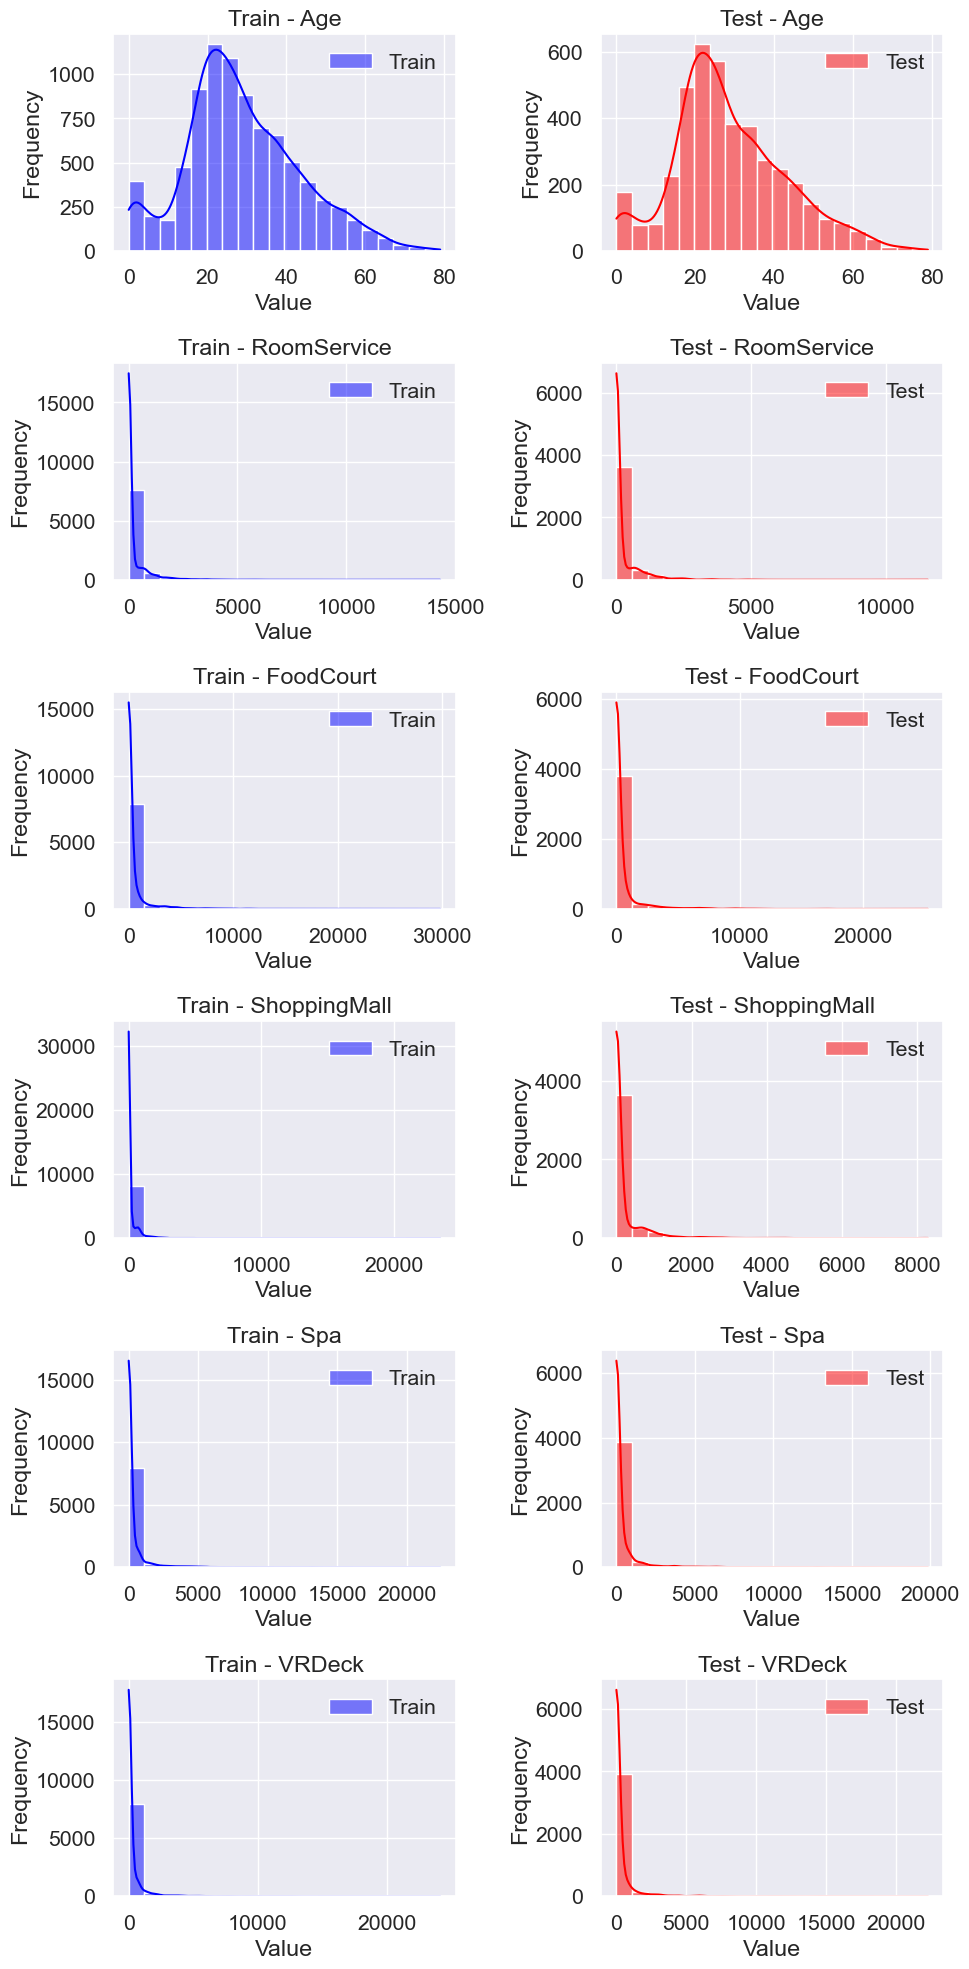

In [20]:
fig, axs = plt.subplots(len(cont_cols), 2, figsize=(10, 20))
for i, col in enumerate(cont_cols):
    max_val = max(train[col].max(), test[col].max())
    min_val = min(train[col].min(), test[col].min())
    range_val = max_val - min_val

    bin_size = range_val / 20
    num_bins_train = round(range_val / bin_size)
    num_bins_test = round(range_val / bin_size)

    sns.histplot(train[col], ax=axs[i][0], color='blue', kde=True, label='Train', bins=num_bins_train)
    sns.histplot(test[col], ax=axs[i][1], color='red', kde=True, label='Test', bins=num_bins_test)
    axs[i][0].set_title(f'Train - {col}')
    axs[i][0].set_xlabel('Value')
    axs[i][0].set_ylabel('Frequency')
    axs[i][1].set_title(f'Test - {col}')
    axs[i][1].set_xlabel('Value')
    axs[i][1].set_ylabel('Frequency')
    axs[i][0].legend()
    axs[i][1].legend()

plt.tight_layout()
plt.show()

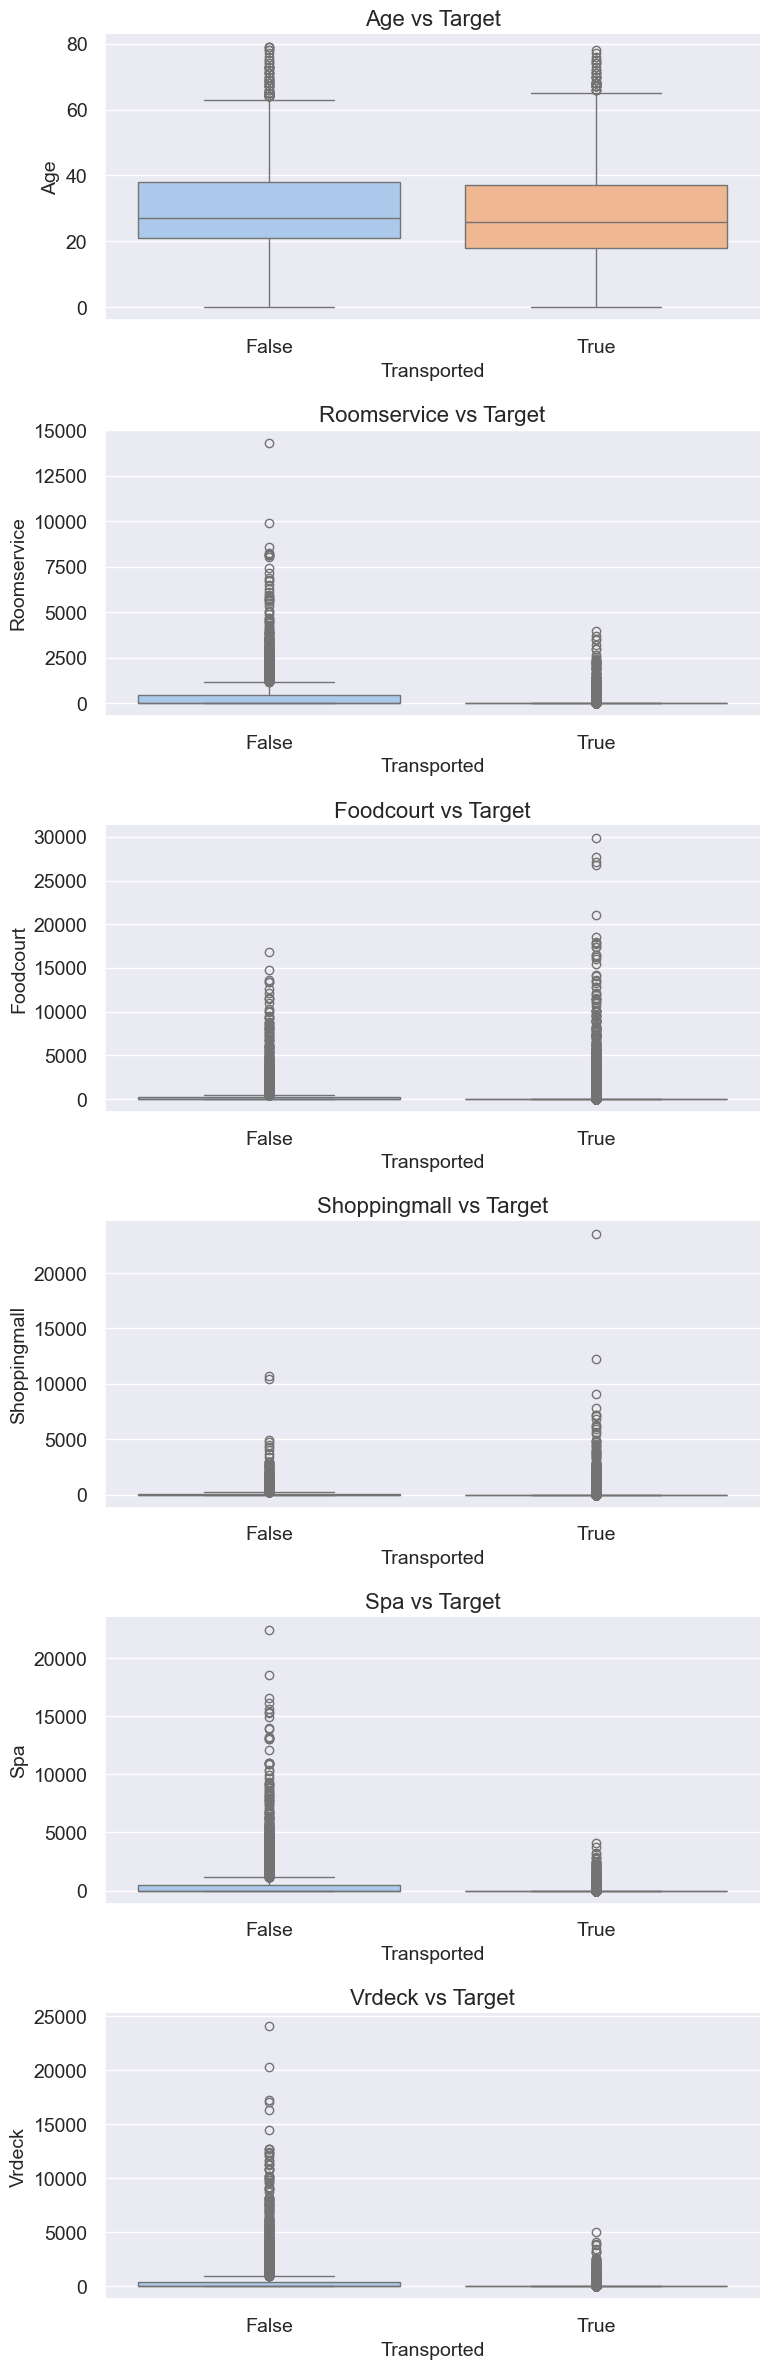

In [21]:
# Create subplots for each continuous feature
fig, axs = plt.subplots(nrows=len(cont_cols), figsize=(8, 4 * len(cont_cols)))
for i, col in enumerate(cont_cols):
    sns.boxplot(x='Transported', y=col, data=train, ax=axs[i], palette='pastel')
    axs[i].set_title(f'{col.title()} vs Target', fontsize=16)
    axs[i].set_xlabel('Transported', fontsize=14)
    axs[i].set_ylabel(col.title(), fontsize=14)
    axs[i].tick_params(axis='both', labelsize=14)
    sns.despine()

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

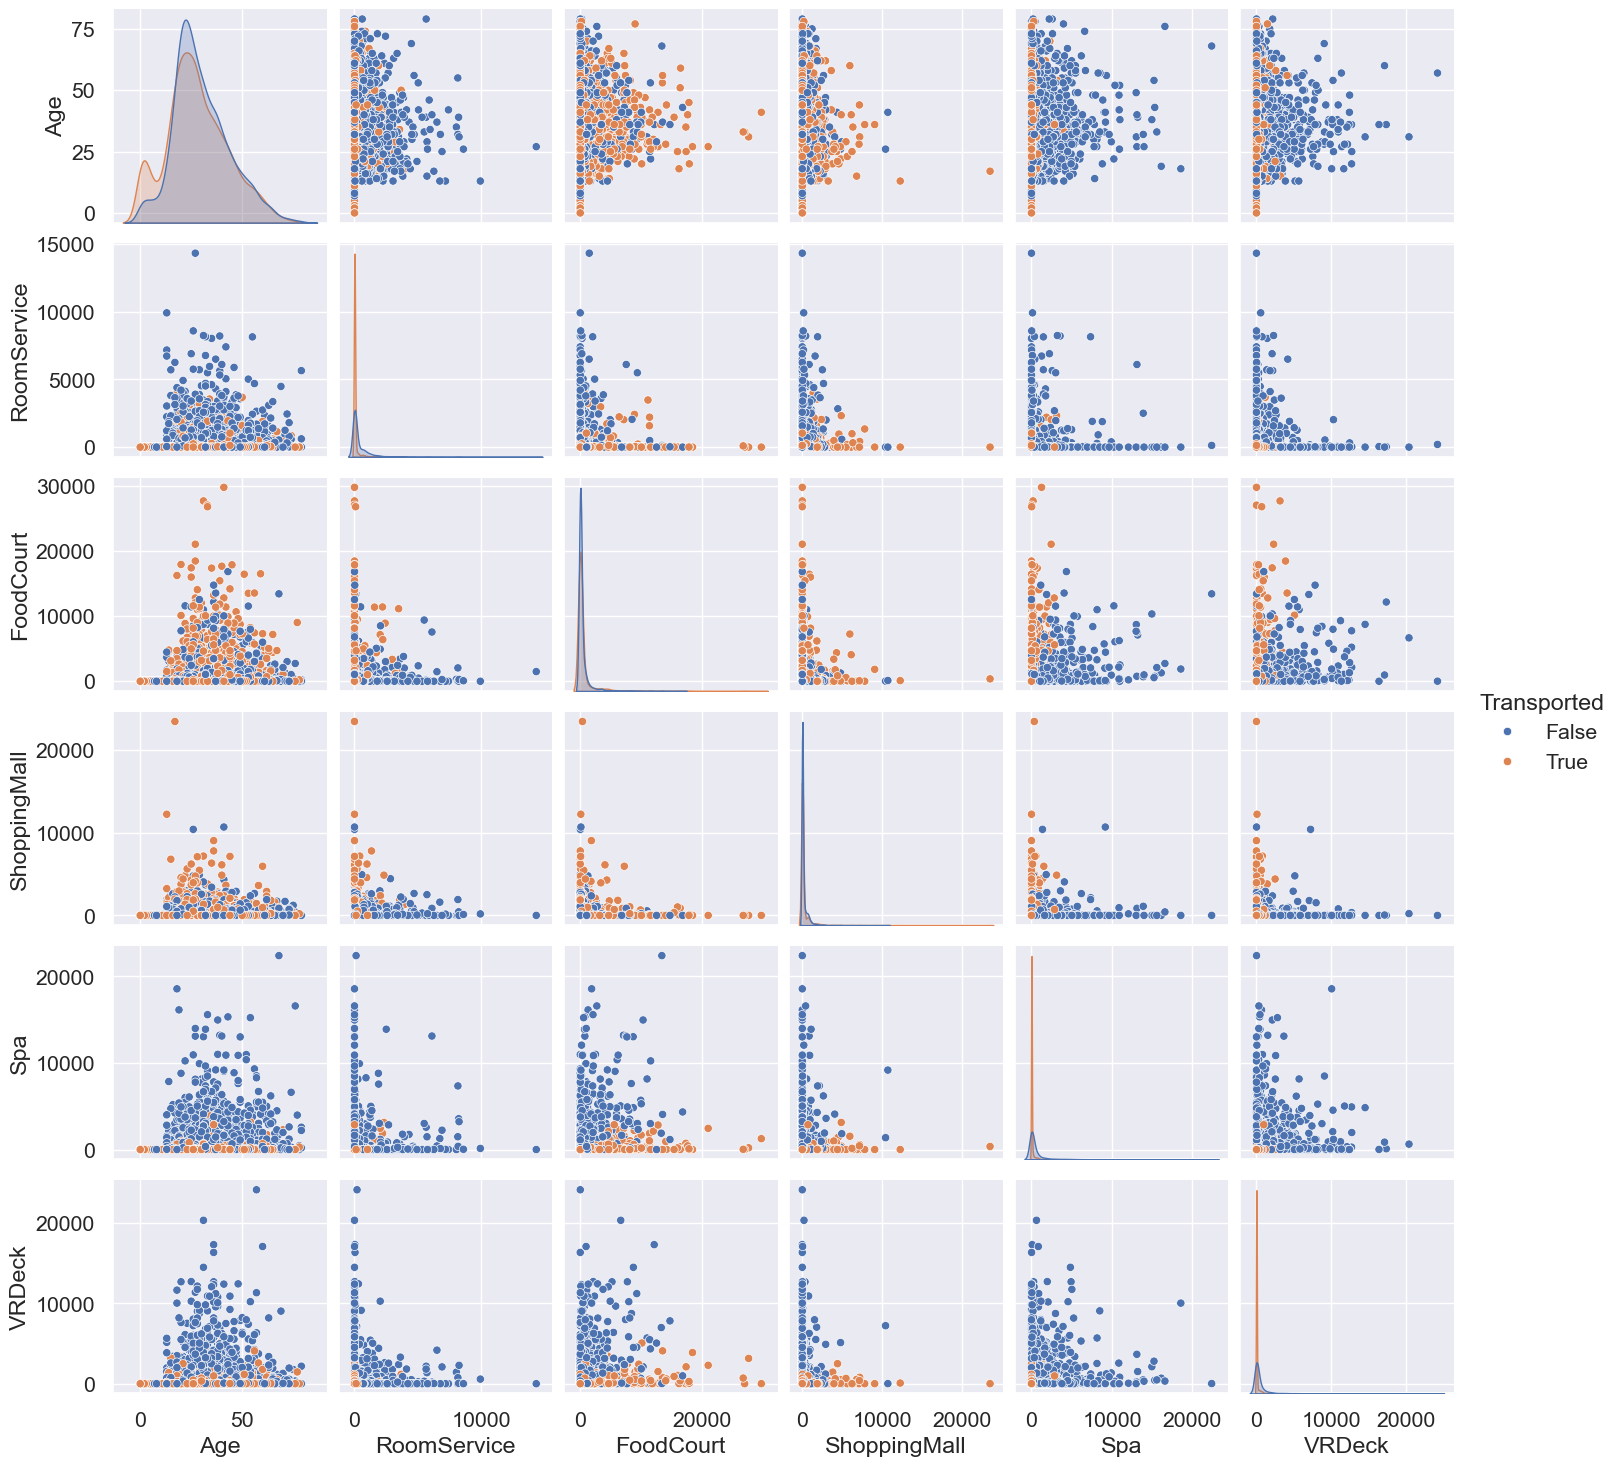

In [22]:
sns.pairplot(data=train, vars=cont_cols, hue='Transported')
plt.show()


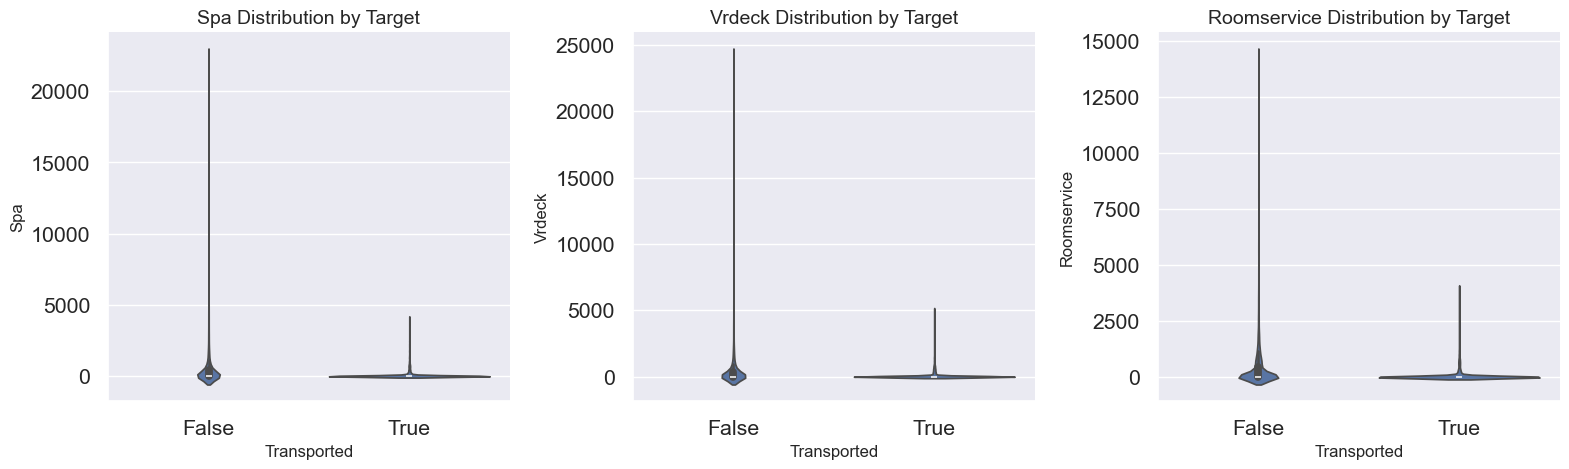

In [23]:
features = ['Spa', 'VRDeck', 'RoomService']
fig, axs = plt.subplots(1, len(features), figsize=(16, 5))
for i, col in enumerate(features):
    sns.violinplot(x='Transported', y=col, data=train, ax=axs[i])
    axs[i].set_title(f'{col.title()} Distribution by Target', fontsize=14)
    axs[i].set_xlabel('Transported', fontsize=12)
    axs[i].set_ylabel(col.title(), fontsize=12)
    sns.despine()

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

In [24]:
def perform_ttest(train, feature_list, target):
    ttest_results = {}
    table = PrettyTable()
    table.field_names = ['Feature', 't_test', 'p_val']
    for feature in feature_list:
        group_0 = train[train[target] == 0][feature]
        group_1 = train[train[target] == 1][feature]
        t_stat, p_val = stats.ttest_ind(group_0, group_1, nan_policy='omit')
        table.add_row([feature, t_stat, p_val])
    return print(table)

perform_ttest(train, cont_cols, 'Transported')

+--------------+--------------------+------------------------+
|   Feature    |       t_test       |         p_val          |
+--------------+--------------------+------------------------+
|     Age      | 6.941461666045089  | 4.165050977554493e-12  |
| RoomService  | 23.27230572812196  | 3.400493892669515e-116 |
|  FoodCourt   | -4.299893771259008 | 1.727865340729664e-05  |
| ShoppingMall | -0.934056481671101 |  0.35030134449892547   |
|     Spa      | 20.914657362229097 | 9.275825095363414e-95  |
|    VRDeck    | 19.517825470012635 | 4.9897017399892476e-83 |
+--------------+--------------------+------------------------+
